In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score
import numpy as np

In [2]:
# demand_bookings_df = pd.read_csv('./hotel_bookings.csv')
# demand_bookings_df.rename(columns = {
#     'adults': 'no_of_adults',
#     'children': 'no_of_children',
#     'stays_in_weekend_nights': 'no_of_weekend_nights',
#     'stays_in_week_nights': 'no_of_week_nights',
#     'meal': 'type_of_meal_plan',
#     'required_car_parking_spaces': 'required_car_parking_space',
#     'reserved_room_type': 'room_type_reserved',
#     'lead_time': 'lead_time',
#     'arrival_date_year': 'arrival_year',
#     'arrival_date_month': 'arrival_month',
#     'arrival_date_day_of_month': 'arrival_date',
#     'market_segment': 'market_segment_type',
#     'is_repeated_guest': 'repeated_guest',
#     'previous_cancellations': 'no_of_previous_cancellations',
#     'previous_bookings_not_canceled': 'no_of_previous_bookings_not_canceled',
#     'adr': 'avg_price_per_room',
#     'total_of_special_requests': 'no_of_special_requests',
#     'is_canceled': 'booking_status'
# }, inplace=True)

# demand_bookings_df['arrival_month'] = demand_bookings_df['arrival_month'].map({
#     'January': 1, 'February': 2, 'March': 3, 'April': 4,
#     'May': 5, 'June': 6, 'July': 7, 'August': 8,
#     'September': 9, 'October': 10, 'November': 11, 'December': 12
# })

# demand_bookings_df['type_of_meal_plan'] = \
#     demand_bookings_df['type_of_meal_plan'].map({
#         'BB': 0, 'HB': 2, 'SC': 1, 'Undefined': 1, 'FB': 3
#     })

# demand_bookings_df['market_segment_type'] = \
#     demand_bookings_df['market_segment_type'].map({
#         "'Online TA": 1, "Offline TA/TO": 0, "Corporate": 2, "Complementary": 4, "Aviation": 3
#     })

# demand_bookings_df['room_type_reserved'] = \
#     demand_bookings_df['room_type_reserved'].map({
#         'A':  0, 'D':  1, 'E':  3, 'F':  2, 'G':  4, 'B':  5, 'C':  6
#     })

# demand_bookings_df['market_segment_type'].fillna(5, inplace=True)
# demand_bookings_df['room_type_reserved'].fillna(7, inplace=True)

In [3]:
train = pd.read_csv('./train.csv').drop('id',axis=1)
cols = train.columns
origin = pd.read_csv('./archive/train__dataset.csv')
train = pd.concat([train,origin],axis=0).drop_duplicates().reset_index(drop=True) # demand_bookings_df
test = pd.read_csv('./test.csv').drop('id',axis=1)

In [4]:
train = train.loc[:,cols]
train['guest'] = train['no_of_adults'] + train['no_of_children']
test['guest'] = test['no_of_adults'] + test['no_of_children']

<AxesSubplot: ylabel='Frequency'>

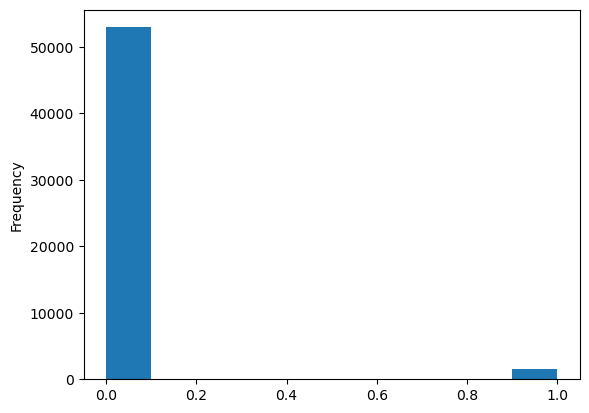

In [5]:
train.required_car_parking_space.plot.hist()

In [6]:
drop_target = ['arrival_year','no_of_previous_cancellations','arrival_date','no_of_previous_bookings_not_canceled',
               'no_of_children','repeated_guest','required_car_parking_space']
train = train.drop(drop_target,axis=1)
test = test.drop(drop_target,axis=1)

In [7]:
train.booking_status.value_counts()

0    34612
1    19961
Name: booking_status, dtype: int64

In [8]:
from pycaret import classification
classification.setup(session_id=41,data=train,target='booking_status')

,Description,Value
0,session_id,41
1,Target,booking_status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(54573, 12)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,9
8,Ordinal Features,False
9,High Cardinality Features,False


(41,
 'box-cox',
        lead_time  avg_price_per_room  no_of_adults_0  no_of_adults_1  \
 20035      150.0          109.800003             0.0             0.0   
 41426       61.0           96.500000             0.0             0.0   
 18742       15.0           97.000000             0.0             0.0   
 34917      103.0          115.000000             0.0             0.0   
 32414      158.0           75.269997             0.0             0.0   
 ...          ...                 ...             ...             ...   
 53930       39.0          156.600006             0.0             0.0   
 31321        9.0           65.000000             0.0             1.0   
 8301        59.0          119.000000             0.0             0.0   
 52176       87.0          104.400002             0.0             0.0   
 398         64.0          149.399994             0.0             0.0   
 
        no_of_adults_2  no_of_adults_3  no_of_adults_4  no_of_weekend_nights_0  \
 20035             1.0 

In [9]:
best = classification.compare_models(sort='AUC',n_select=4,fold=10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8249,0.8945,0.7312,0.7773,0.7535,0.6180,0.6187,0.8480
catboost,CatBoost Classifier,0.8232,0.8936,0.7231,0.7783,0.7496,0.6133,0.6144,2.0480
lightgbm,Light Gradient Boosting Machine,0.8223,0.8914,0.7230,0.7761,0.7486,0.6114,0.6123,0.1110
gbc,Gradient Boosting Classifier,0.8109,0.8777,0.6944,0.7669,0.7288,0.5841,0.5859,0.6430
ada,Ada Boost Classifier,0.7957,0.8667,0.6930,0.7342,0.7129,0.5546,0.5552,0.1760
rf,Random Forest Classifier,0.7913,0.8543,0.6826,0.7299,0.7054,0.5441,0.5449,0.5170
lr,Logistic Regression,0.7847,0.8509,0.6539,0.7297,0.6896,0.5256,0.5274,1.7250
lda,Linear Discriminant Analysis,0.7817,0.8490,0.6519,0.7242,0.6861,0.5195,0.5212,0.1850
knn,K Neighbors Classifier,0.7643,0.8112,0.6429,0.6915,0.6662,0.4844,0.4852,0.3070
et,Extra Trees Classifier,0.7604,0.8031,0.6433,0.6835,0.6627,0.4772,0.4778,0.7170


In [10]:
best_tune = [classification.tune_model(i) for i in best]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8236,0.8868,0.7346,0.7722,0.7529,0.6159,0.6164
1,0.8191,0.8880,0.7296,0.7652,0.7470,0.6063,0.6068
2,0.8120,0.8814,0.7167,0.7568,0.7362,0.5904,0.5909
3,0.8183,0.8899,0.7153,0.7716,0.7424,0.6024,0.6034
4,0.8225,0.8907,0.7346,0.7699,0.7518,0.6138,0.6142
5,0.8270,0.8870,0.7182,0.7899,0.7523,0.6198,0.6215
6,0.8136,0.8820,0.7182,0.7595,0.7382,0.5937,0.5943
7,0.8170,0.8842,0.7353,0.7576,0.7463,0.6032,0.6034
8,0.8204,0.8929,0.7203,0.7734,0.7459,0.6073,0.6082


In [11]:
best_tune

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.9,
               enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               learning_rate=0.001, max_delta_step=0, max_depth=4,
               min_child_weight=3, missing=nan, monotone_constraints='()',
               n_estimators=140, n_jobs=-1, num_parallel_tree=1,
               objective='binary:logistic', predictor='auto', random_state=41,
               reg_alpha=0.4, reg_lambda=0.5, scale_pos_weight=1.2,
               subsample=0.9, tree_method='auto', use_label_encoder=True,
               validate_parameters=1, verbosity=0),
 LGBMClassifier(bagging_fraction=0.9, bagging_freq=1, boosting_type='gbdt',
                class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
                importance_type='split', learning_rate=0.2, max_depth=-1,
                min_child_samples=61, 

In [12]:
best_tune[0].get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.9,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.001,
 'max_delta_step': 0,
 'max_depth': 4,
 'min_child_weight': 3,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 140,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 41,
 'reg_alpha': 0.4,
 'reg_lambda': 0.5,
 'scale_pos_weight': 1.2,
 'subsample': 0.9,
 'tree_method': 'auto',
 'validate_parameters': 1,
 'verbosity': 0}

In [13]:
best_tune[1].get_params()

{'depth': 6,
 'l2_leaf_reg': 20,
 'border_count': 254,
 'verbose': False,
 'random_strength': 0.6,
 'task_type': 'CPU',
 'n_estimators': 90,
 'random_state': 41,
 'eta': 0.5}

In [14]:
import catboost
params = best_tune[1].get_params()
cat = catboost.CatBoostClassifier(**params)
cat.fit(train.drop('booking_status',axis=1),train['booking_status'])
proba_cat = cat.predict_proba(test)

In [15]:
import xgboost
params = best_tune[0].get_params()
xgb = xgboost.XGBClassifier(**params)
xgb.fit(train.drop('booking_status',axis=1),train['booking_status'])
proba_xgb = xgb.predict_proba(test)

In [16]:
import lightgbm
params = best_tune[2].get_params()
lgb = lightgbm.LGBMClassifier(**params)
lgb.fit(train.drop('booking_status',axis=1),train['booking_status'])
proba_lgb = lgb.predict_proba(test)

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
params = best_tune[3].get_params()
gb = GradientBoostingClassifier(**params)
gb.fit(train.drop('booking_status',axis=1),train['booking_status'])
proba_ggb = gb.predict_proba(test)

In [18]:
proba = [proba_cat,proba_xgb,proba_lgb,proba_ggb]
proba = [[j[1] for j in i] for i in proba]

<BarContainer object of 11 artists>

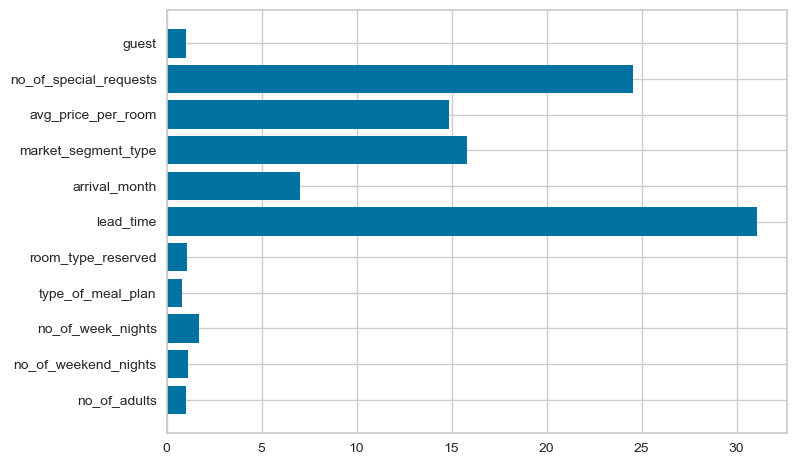

In [19]:
import matplotlib.pyplot as plt
plt.barh(cat.feature_names_,cat.feature_importances_)

<BarContainer object of 11 artists>

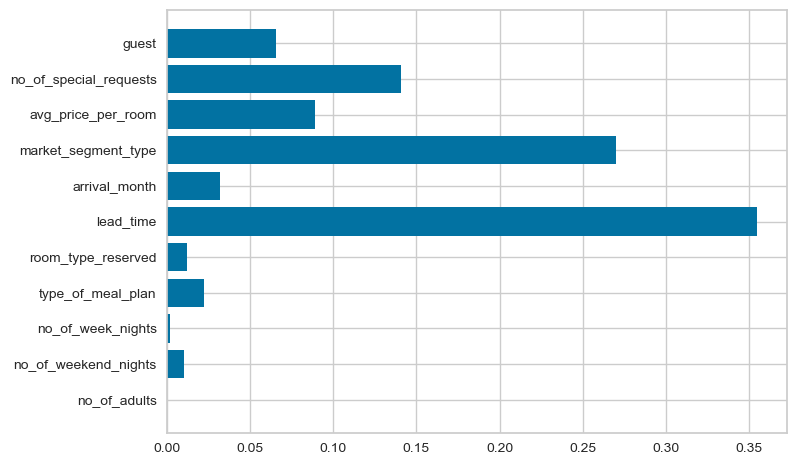

In [20]:
plt.barh(cat.feature_names_,xgb.feature_importances_)

<BarContainer object of 11 artists>

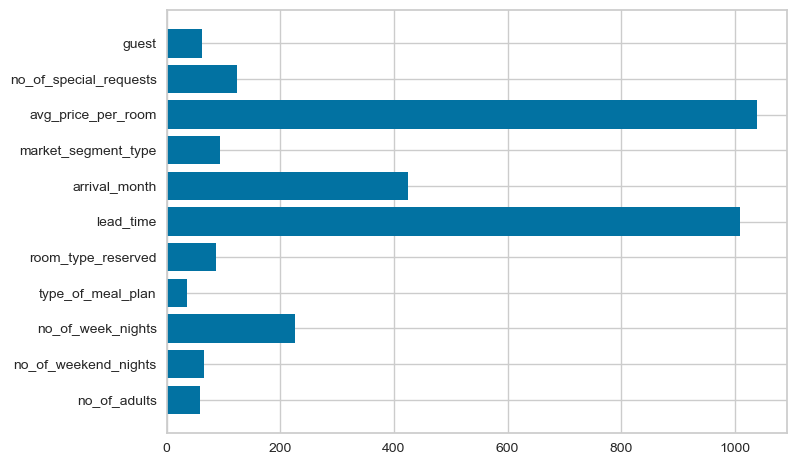

In [21]:
plt.barh(cat.feature_names_,lgb.feature_importances_)

In [22]:
best_tune

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.9,
               enable_categorical=False, gamma=0, gpu_id=-1,
               importance_type=None, interaction_constraints='',
               learning_rate=0.001, max_delta_step=0, max_depth=4,
               min_child_weight=3, missing=nan, monotone_constraints='()',
               n_estimators=140, n_jobs=-1, num_parallel_tree=1,
               objective='binary:logistic', predictor='auto', random_state=41,
               reg_alpha=0.4, reg_lambda=0.5, scale_pos_weight=1.2,
               subsample=0.9, tree_method='auto', use_label_encoder=True,
               validate_parameters=1, verbosity=0),
 LGBMClassifier(bagging_fraction=0.9, bagging_freq=1, boosting_type='gbdt',
                class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
                importance_type='split', learning_rate=0.2, max_depth=-1,
                min_child_samples=61, 

In [23]:
sub = pd.read_csv('./sample_submission.csv')
sub['booking_status'] = 0.0*np.array(proba[0]) + 0.0*np.array(proba[1]) + 0.6*np.array(proba[2]) + 0.4*np.array(proba[3])# np.array(proba).mean(axis=0)
sub = sub.set_index('id')
sub.to_csv('./submission.csv')

In [24]:
sub

,booking_status
id,
42100,0.324847
42101,0.089223
42102,0.245191
42103,0.039403
42104,0.291216
...,...
70163,0.930849
70164,0.031975
70165,0.061989


<AxesSubplot: ylabel='Frequency'>

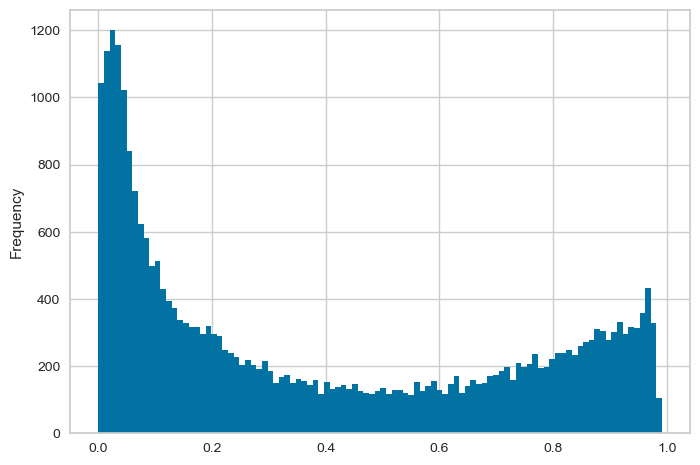

In [25]:
sub['booking_status'].plot.hist(bins=100)